In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from userfunctions import *

In [2]:
#plt.style.use('default')
sns.set()

In [3]:
#загрузили исходные данные
df_raw = pd.read_excel(r'Prioksk_Air_in.xlsx')
#очистили их от того, что не потребуется и что может привести к ошибкам
df = PrepareDataFrame(df_raw.copy())
#создадим копию для удобства
data_total = df.copy()
winter_data, spring_data, summer_data, autumn_data = PrepareSeasonalDataFrame(df.copy())

Некорректные строки удалены:

        YY  MM  DD  TSP  SO2  SO4   HG   PB   CD  NO2
5187  1998   9  31  NaN  0.0  NaN  NaN  NaN  NaN  NaN


# HG

In [4]:
ELEM_NAME = 'HG'
ELEM = CreateDataBySeasons(ELEM_NAME
                           , data_total, winter_data, spring_data, summer_data, autumn_data
                           , with_zero=True)
VALUES = ExtractValues(ELEM)

if CountZerosInData(VALUES['all'], ELEM_NAME) > 0:
    #НЕ словарь, просто массив по полной выборке соответ-го элемента
    ELEM_NOT_NULL = CreateDataBySeasons(ELEM_NAME
                                        , data_total, winter_data, spring_data, summer_data, autumn_data
                                        , with_zero=False)
    VALUES_NOT_NULL = ExtractValues(ELEM_NOT_NULL)
else:
    VALUES_NOT_NULL = VALUES

Число нулевых элементов в полной выборке HG: 0



Гистограмма для полной выборки HG


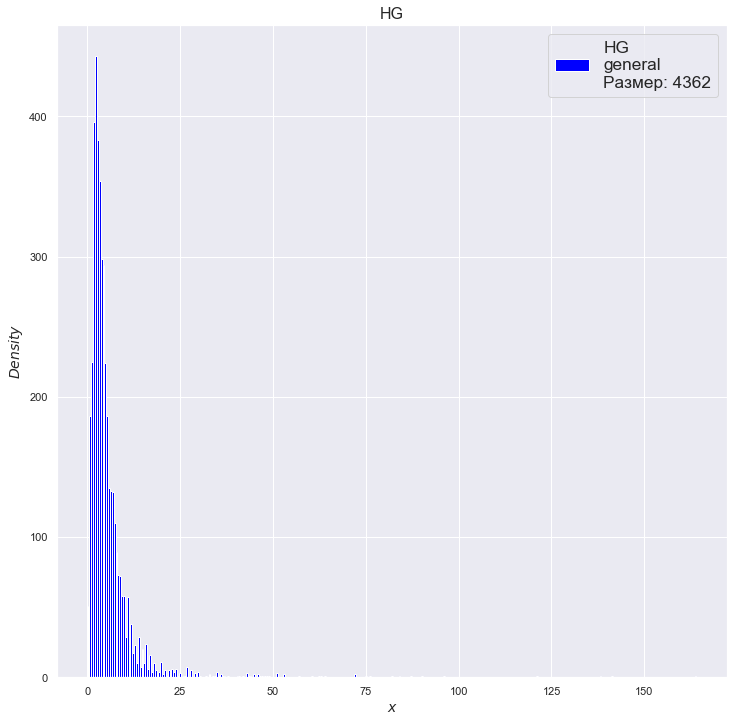

In [5]:
HistOnSample(VALUES['all'],ELEM_NAME)

In [90]:
start = datetime.datetime.now()
distr_ks, params_ks, p_v_ks, distr_chi2, params_chi2, p_v_chi2 = GetBestDistribution(VALUES_NOT_NULL['all'])
print ('\nTook time: {0}'.format(datetime.datetime.now()-start))


Chi2
Best fitting distribution: mielke
Best p value: 0.05485306602503541
Parameters for the best fit: (2.9004316818007236, 2.11840414560615, -0.08943811773337099, 3.244617697478571)

K-S
Best fitting distribution: johnsonsu
Best p value: 0.18970371027407615
Parameters for the best fit: (-1.9012858507744619, 1.046021648599619, 0.9391833479453102, 0.9674904965061653)

Took time: 0:00:24.444561


In [91]:
distr_params_all = defaultdict(dict)
if p_v_ks >= 0.05:
    distr_params_all['general'][distr_ks] = params_ks
if p_v_chi2 >= 0.05:
    distr_params_all['general'][distr_chi2] = params_chi2

Text(0.5, 1.0, 'HG')

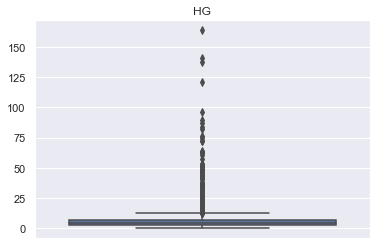

In [6]:
sns.boxplot(VALUES['all'],orient='v').set_title(ELEM_NAME)

In [85]:
SizeSample(VALUES['all'], ELEM_NAME)
k = CountZerosInData(VALUES['all'], ELEM_NAME)
CountByTreshold(VALUES['all'], ELEM_NAME, 5 , 0.5)

Размер полной выборки для HG равен 4362
Число нулевых элементов в полной выборке HG: 0

Посмотрим на число элементов выше и ниже некоторых порогов для выборки HG

Порог: 0.0, значений выше: 4362, ниже: 0
Порог: 0.5, значений выше: 4328, ниже: 34
Порог: 1.0, значений выше: 4159, ниже: 203
Порог: 1.5, значений выше: 3952, ниже: 410
Порог: 2.0, значений выше: 3580, ниже: 782
Порог: 2.5, значений выше: 3157, ниже: 1205
Порог: 3.0, значений выше: 2746, ниже: 1616
Порог: 3.5, значений выше: 2392, ниже: 1970
Порог: 4.0, значений выше: 2083, ниже: 2279
Порог: 4.5, значений выше: 1793, ниже: 2569
Порог: 5.0, значений выше: 1559, ниже: 2803


Построение графика всей выборки для HG


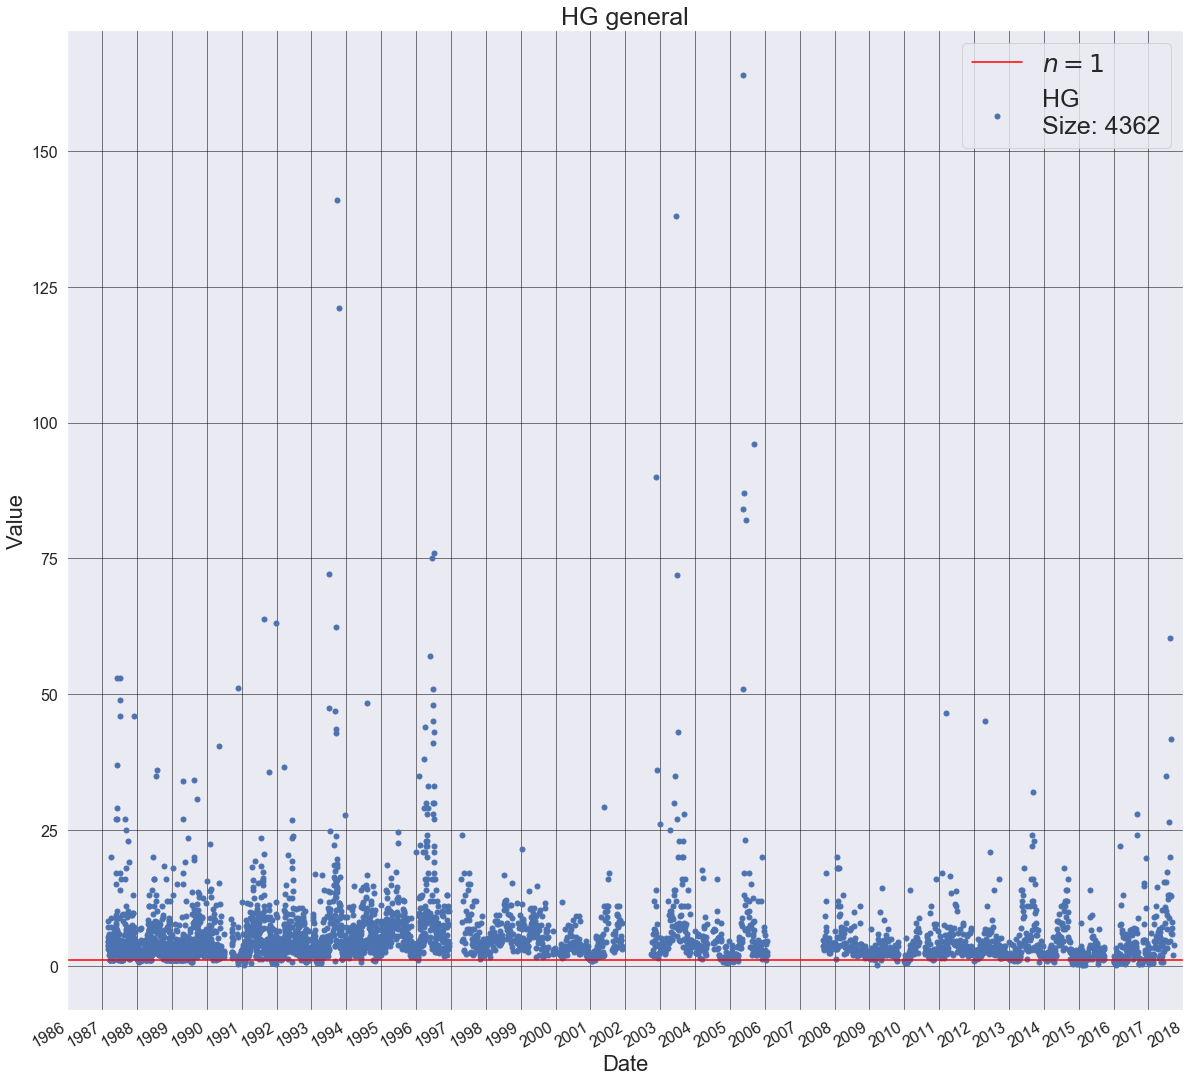

In [109]:
PlotElement(ELEM['all'],ELEM_NAME,'general',20,20,1)

Гистограмма 0-1 теста Колмогорова-Смирнова для выборки HG


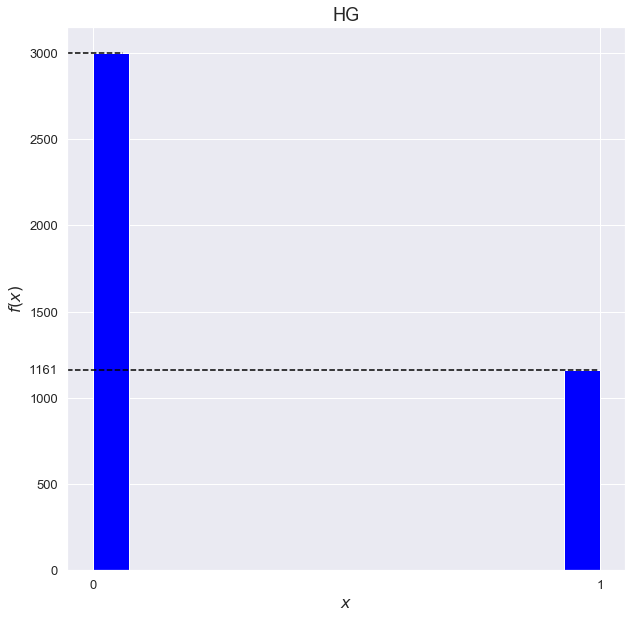

In [87]:
HistOnKSTest2Sample(KSTest2Sample(VALUES['all']), ELEM_NAME)

Принимаем гипотезу однородности К-С, если p-value > 0.05, сопоставляем ей 1, иначе 0
Число подряд идущих 1 - синим цветом, 0 - серым 


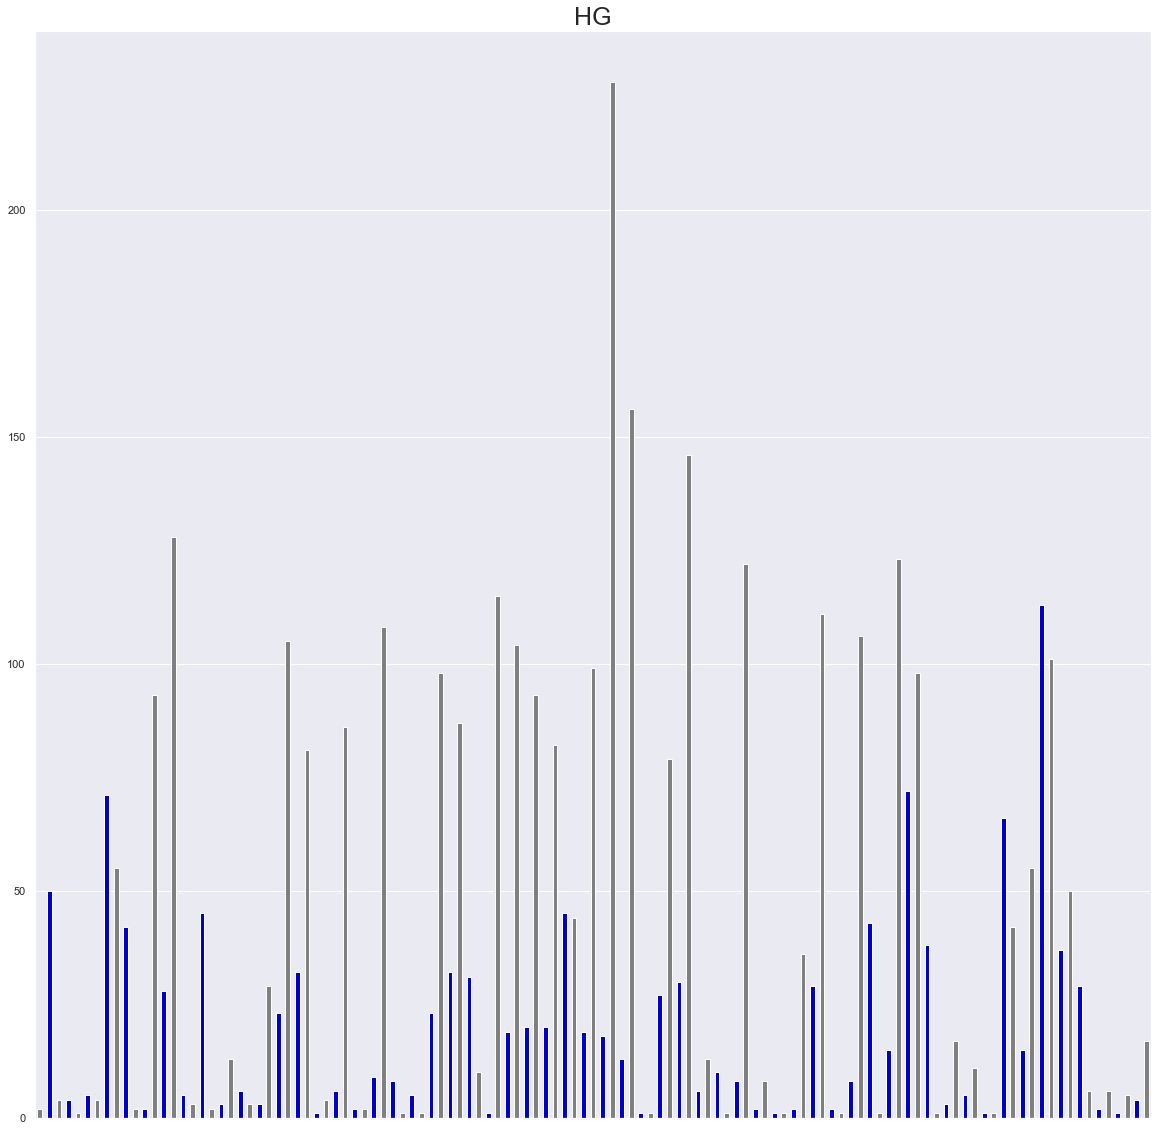

In [88]:
HistOnRepValues(RepeatedValuesCount(KSTest2Sample(VALUES['all'])),ELEM_NAME)

Поделим выборку на train и test (90 к 10), по 1-й оценим параметры, по 2-й проверим гипотезу о согласии К-С и Хи-квадрат для Гамма распределения

In [94]:
test_size = 0.1

while True: 
    train, test = train_test_split(VALUES_NOT_NULL['all'], test_size=test_size)
    params = FitParams(train,'gamma', floc=0)
    s_chi2, p_chi2 = ChiSquareOnTest(test, 'gamma', params)
    s_ks, p_ks = KSOnTest(test, 'gamma', params)
    if p_chi2 >= 0.05 or p_ks >= 0.1:
        break
#based on chi2 and ks
#HG
print('shape,loc,scale = {0}, p_v on Chi2 = {1}, p_v on KS = {2}'.format(params, p_chi2, p_ks))

shape,loc,scale = (1.5262575419871987, 0, 3.7334808128046824), p_v on Chi2 = 0.0, p_v on KS = 0.11613088522605813


In [36]:
distr_params_all['general']['gamma'] = params

Гистограмма для выборки HG, сезон - general
Поверх нее строятся теоритические функции плотности вероятности с вычисленными параметрами


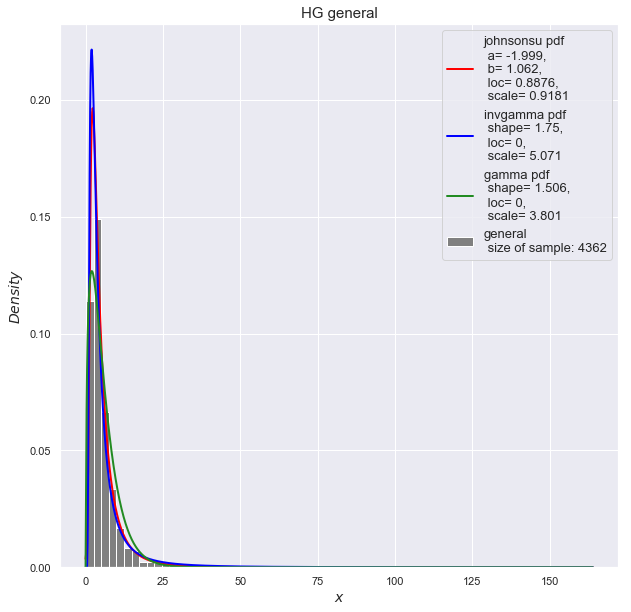

In [37]:
DistributionBySeason(VALUES['all'], ELEM_NAME, 'general', distr_params_all['general'])

In [96]:
distr_params_all

defaultdict(dict,
            {'general': {'mielke': (3.482524825857583,
               2.1274082489377024,
               -0.2184428787743982,
               3.029517784796375),
              'gamma': (1.5307815856506242, 0, 3.707584389588657)}})

In [97]:
#GAMMA

print('GAMMA\n')

stat, p_v = KSOnTest(test, 'gamma', params)
print('KS TEST:\nPower_divergenceResult(statistic={0}, pvalue={1})'.format(stat, p_v))
stat, p_v = ChiSquareOnTest(test, 'gamma', params)
print('CHISQARE TEST:\nPower_divergenceResult(statistic={0}, pvalue={1})'.format(stat, p_v))


GAMMA

KS TEST:
Power_divergenceResult(statistic=0.05754466025788596, pvalue=0.10645236527425407)
CHISQARE TEST:
Power_divergenceResult(statistic=1173631.1925039787, pvalue=0.0)


## Рассмотрим сезонные выборки

In [98]:
params_seasons = {}

In [99]:
#GAMMA

seasons = ['winter', 'spring', 'summer', 'autumn']
params_seasons = {}
train_test_seasons = {}
for s in seasons:
    while True: 
        train, test = train_test_split(VALUES_NOT_NULL[s], test_size=0.2)
        params_seasons[s] = FitParams(train, 'gamma',0)
        s_chi2, p_chi2 = ChiSquareOnTest(test, 'gamma', params_seasons[s])
        s_ks, p_ks = KSOnTest(test, 'gamma', params_seasons[s])
        if p_chi2 >= 0.1 or p_ks >=0.2:
            train_test_seasons[s] = [train, test]
            break
            
for s in seasons:
    print(s, ': ', params_seasons[s])
print('p_v on Chi2 = {0}, p_v on KS = {1}'.format(p_chi2, p_ks))

winter :  (1.9743294634181, 0, 1.800426923769885)
spring :  (1.76853125483749, 0, 3.2328172580666834)
summer :  (1.5826595842093147, 0, 4.697308969853064)
autumn :  (1.6124174656119041, 0, 3.445578123106737)
p_v on Chi2 = 0.0, p_v on KS = 0.25472992723024135


In [95]:
start = datetime.datetime.now()
seasons = ['winter', 'spring', 'summer', 'autumn']
params_seasons_ks,params_seasons_chi2 = defaultdict(dict), defaultdict(dict)
train_test_seasons1 = {}
for s in seasons:
    print()
    print(s.upper())
    print()
    distr_ks,params_ks,p_v_ks, distr_chi2,params_chi2, p_v_chi2 = GetBestDistribution(VALUES_NOT_NULL[s])
    if p_v_ks >= 0.05:
        params_seasons_ks[s][distr_ks] = params_ks
    if p_v_chi2 >= 0.05:
        params_seasons_chi2[s][distr_chi2] = params_chi2
print('\nTook time: {0}'.format(datetime.datetime.now()-start))


WINTER


Chi2
Best fitting distribution: invgamma
Best p value: 0.3053622427966286
Parameters for the best fit: (1.7340165040451812, 0, 3.4425466922152856)

K-S
Best fitting distribution: mielke
Best p value: 0.9630918010234641
Parameters for the best fit: (2.339528295378625, 2.5926338063312215, 0, 2.9041579338357972)

SPRING


Chi2
Best fitting distribution: invgamma
Best p value: 0.05507923344188262
Parameters for the best fit: (1.9323409932708273, 0, 6.231751493542142)

K-S
Best fitting distribution: f
Best p value: 0.8647032061083615
Parameters for the best fit: (10.336358084495723, 6.934181138192233, 0, 4.0561076567682015)

SUMMER


Chi2
Best fitting distribution: invgamma
Best p value: 0.3011224141341027
Parameters for the best fit: (1.8869728957435026, 0, 7.59412006804523)

K-S
Best fitting distribution: invgamma
Best p value: 0.6924333613130628
Parameters for the best fit: (1.8869728957435026, 0, 7.59412006804523)

AUTUMN


Chi2
Best fitting distribution: invgamma
Best p value

In [101]:
distr_params_seasons = defaultdict(dict)
for s in seasons:
    try:
        distr_ks, params_ks = list(params_seasons_ks[s].keys())[0], list(params_seasons_ks[s].values())[0] 
        distr_params_seasons[s][distr_ks] = params_ks
    except IndexError:
        continue
for s in seasons:
    try:
        distr_chi2, params_chi2 = list(params_seasons_chi2[s].keys())[0], list(params_seasons_chi2[s].values())[0] 
        distr_params_seasons[s][distr_chi2] = params_chi2
    except IndexError:
        continue
for s in seasons:
    params_gamma = params_seasons[s]
    distr_params_seasons[s]['gamma'] = params_gamma
    

Гистограмма для выборки HG, сезон - winter
Поверх нее строятся теоритические функции плотности вероятности с вычисленными параметрами


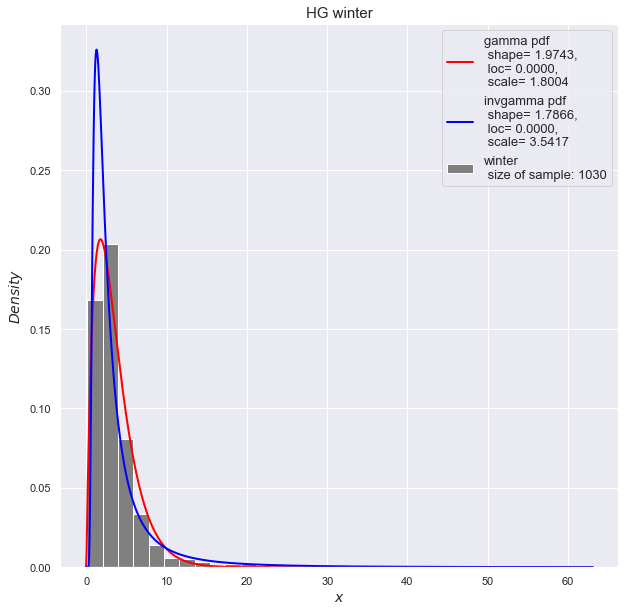

Гистограмма для выборки HG, сезон - spring
Поверх нее строятся теоритические функции плотности вероятности с вычисленными параметрами


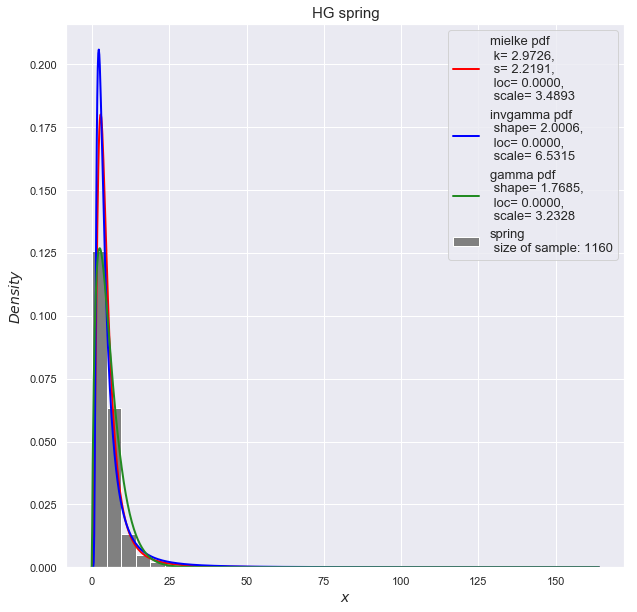

Гистограмма для выборки HG, сезон - summer
Поверх нее строятся теоритические функции плотности вероятности с вычисленными параметрами


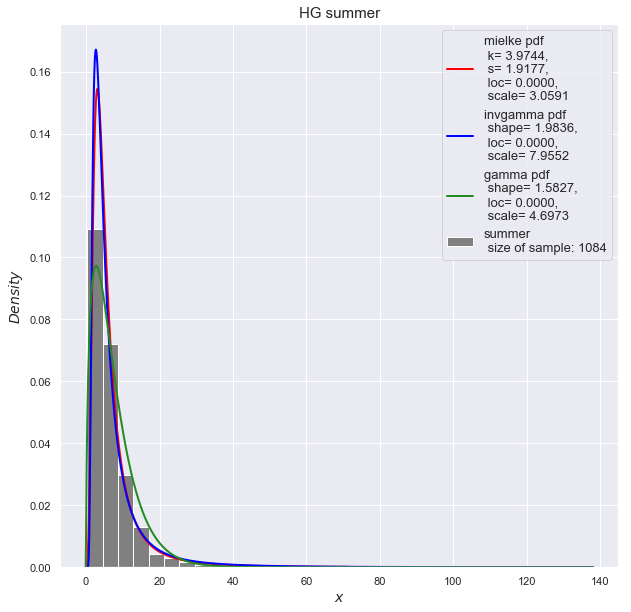

Гистограмма для выборки HG, сезон - autumn
Поверх нее строятся теоритические функции плотности вероятности с вычисленными параметрами


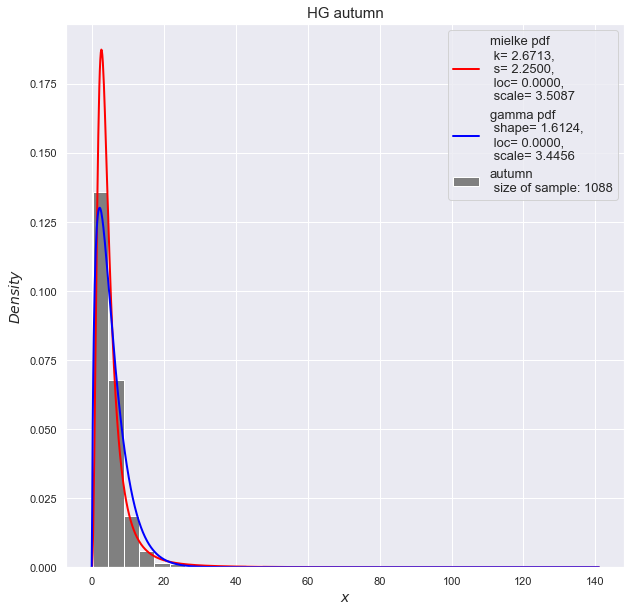

In [113]:
for s in seasons:
    DistributionBySeason(VALUES_NOT_NULL[s], ELEM_NAME, season=s, params_dict=distr_params_seasons[s])

### Проверка гипотезы о согласии Хи-квадрат и К-С для сезонных выборок для Гамма распределения
#### для других подобранных распределений результаты выше

In [103]:
for s in seasons:
    print(s.upper())
    print()
    stat, p_v = KSOnTest(train_test_seasons[s][1], 'gamma', params_seasons[s])
    print('KS TEST:\nPower_divergenceResult(statistic={0}, pvalue={1})'.format(stat, p_v))
    stat, p_v = ChiSquareOnTest(train_test_seasons[s][1], 'gamma', params_seasons[s])
    print('CHISQARE TEST:\nPower_divergenceResult(statistic={0}, pvalue={1})'.format(stat, p_v))
    print()

WINTER

KS TEST:
Power_divergenceResult(statistic=0.06706526518052691, pvalue=0.29983417440099974)
CHISQARE TEST:
Power_divergenceResult(statistic=28082421548.650314, pvalue=0.0)

SPRING

KS TEST:
Power_divergenceResult(statistic=0.06764682094994656, pvalue=0.22868156528912595)
CHISQARE TEST:
Power_divergenceResult(statistic=nan, pvalue=nan)

SUMMER

KS TEST:
Power_divergenceResult(statistic=0.058915287327434805, pvalue=0.4264808354636571)
CHISQARE TEST:
Power_divergenceResult(statistic=18756.26357810266, pvalue=0.0)

AUTUMN

KS TEST:
Power_divergenceResult(statistic=0.06798740177442952, pvalue=0.25472992723024135)
CHISQARE TEST:
Power_divergenceResult(statistic=91208449956.71756, pvalue=0.0)



## Нарисуем 4 гамма распределения, полученные в результате работы ЕМ алгоритма
Выборка делилась на 4 части, учитывая след формулу "количество элементов за данное время года / вся выборка"

Использовался метод gammamixEM из R

In [110]:
dic = {'x':VALUES_NOT_NULL['all']}
df = pd.DataFrame(dic, columns=['x'])
df.to_csv('HGall.csv', index=False)

In [106]:
print('PROPORTIONS OF SEASON DATA FROM ALL DATA')
print('WINTER:', len(VALUES['winter'])/len(VALUES['all']), sep=' ')
print('SPRING:', len(VALUES['spring'])/len(VALUES['all']), sep=' ')
print('SUMMER:', len(VALUES['summer'])/len(VALUES['all']), sep=' ')
print('AUTUMN:', len(VALUES['autumn'])/len(VALUES['all']), sep=' ')

PROPORTIONS OF SEASON DATA FROM ALL DATA
WINTER: 0.23613021549747823
SPRING: 0.26593305823016966
SUMMER: 0.24850985786336544
AUTUMN: 0.2494268684089867


Веса: [0.32111266, 0.32513275, 0.04161263, 0.31214197]


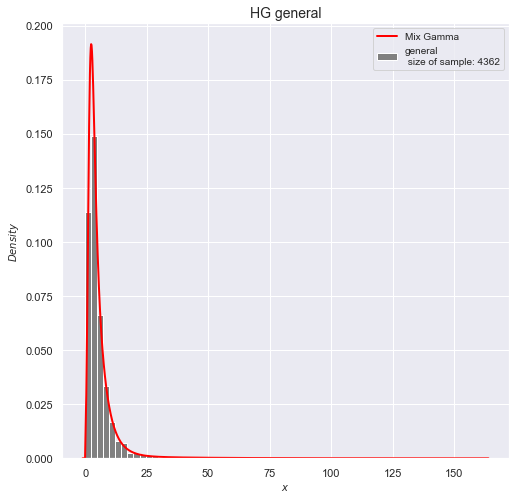

In [98]:
sh_loc_sc1, lamb1 = FormShLocScLamb('5.0070473 1.800356  1.107194 2.914435', '0.5913905 3.696121 24.156273 1.651942',
                                   '0.32111266 0.32513275 0.04161263 0.31214197')

x = np.linspace(-1, max(VALUES['all']),1000)

print('Веса: {0}'.format(lamb1))  
fig3 = EMGammaMixPlot_4(sh_loc_sc1, lamb1)
fig3.savefig(ELEM_NAME+'_MixGamma.png', bbox_inches='tight', pad_inches=0)